In [141]:
import torch
from torch.distributions.normal import Normal
from torch.distributions.multivariate_normal import MultivariateNormal
from torch.distributions.independent import Independent

import time

import matplotlib.pyplot as plt

In [274]:
torch.manual_seed(34)
n = 1
d = 2
X_no_intercept = torch.randn(n, d - 1)
X = torch.hstack([X_no_intercept, torch.ones(n, 1)])
w = torch.Tensor([-5.] * d).view(1, d)
σ = 0.5
y = X @ w.T + torch.randn(n, 1) * σ

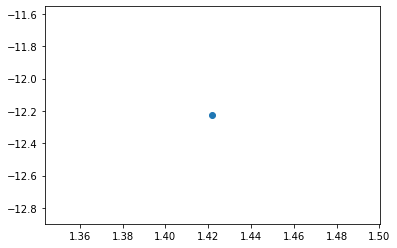

In [275]:
plt.scatter(X_no_intercept.view(-1), y.view(-1))
plt.show()

In [276]:
prior = MultivariateNormal(loc=torch.zeros(d, ), covariance_matrix=torch.eye(d))

In [277]:
def log_unnormalized_posterior(w):
    # X: (n, d)
    # w: (m, d)
    # w @ X.T: (m, d) @ (d, n) = (m, n)
    model = Independent(Normal(loc=(w @ X.T), scale=σ), 1)
    # too inefficient
    #model = MultivariateNormal(loc=(w @ X.T), covariance_matrix=torch.eye(n) * σ)
    return prior.log_prob(w) + model.log_prob(y.view(1, -1))

In [278]:
xs = torch.linspace(-20, 20, 100)
ys = torch.linspace(-20, 20, 100)
xxs, yys = torch.meshgrid(xs, ys)
xxsyys = torch.hstack([xxs.reshape(-1, 1), yys.reshape(-1, 1)])
logposts = log_unnormalized_posterior(xxsyys).view(100, 100)

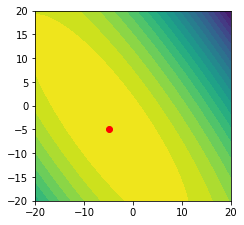

In [279]:
plt.figure(figsize=(3.5, 3.5))
plt.contourf(xxs, yys, logposts, levels=20)
plt.scatter([w[0][0]], [w[0][1]], color="red")
plt.show()